In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Pc\\Downloads\\FR_CO2.csv")

In [3]:
df.isna().sum()

ID                            0
Country                       0
VFN                           3
Mp                       133053
Mh                            0
Man                           0
MMS                     1889602
Tan                           1
T                             1
Va                            1
Ve                            2
Mk                            0
Cn                            0
Ct                            0
Cr                            0
r                             0
m (kg)                        1
Mt                            1
Enedc (g/km)            1889602
Ewltp (g/km)                  0
W (mm)                  1889602
At1 (mm)                1889602
At2 (mm)                1889602
Ft                            0
Fm                            0
ec (cm3)                 309734
ep (KW)                    3239
z (Wh/km)               1415328
IT                       578477
Ernedc (g/km)           1889602
Erwltp (g/km)            578477
De      

In [4]:
col_to_del = ['MMS', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ernedc (g/km)', 'De', 'Vf']

In [5]:
# colonnes à supprimer car pas assez remplies (à valider, on peut peut être aussi inclure IT et Erwltp (g/km))
col_to_del.append('RLFI')

In [6]:
# colonnes à supprimer car doublons d'information
col_to_del.extend(('Mp', 'Mh', 'Man', 'Cr', 'm (kg)', 'Fm'))

In [7]:
# colonnes à supprimer car non pertinentes (infos administratives ou relatives au jeu de données en lui-même)
col_to_del.extend(('ID', 'Status', 'r', 'year', 'Tan', 'Va', 'Ve', 'Ct', 'Cr'))

In [8]:
# suppression des lignes concernant les véhicules électriques ainsi que des colonnes concernant ces véhicules uniquement
df = df[df['Ft'] != 'electric']
col_to_del.append('Electric range (km)')

In [9]:
# suppresion de colonnes sélectionnées
df = df.drop(col_to_del, axis=1)

In [10]:
# suppresion des doublons
df = df.drop_duplicates()

In [11]:
df.to_csv("C:\\Users\\Pc\\Downloads\\ReducedFRCO2.csv", index=False)

In [12]:
df = pd.read_csv("C:\\Users\\Pc\\Downloads\\ReducedFRCO2.csv")

In [13]:
df.head(5)

Country                       VFN              T       Mk             Cn  \
0      FR  IP-JLA1N0PDW5A_002-VF1-1            RJL  RENAULT         ARKANA   
1      FR             IP-0120-JT1-1  XA5P(S)(EU.M)   SUZUKI  SUZUKI ACROSS   
2      FR    IP-HNS____ATN83445-VF3              M  PEUGEOT           3008   
3      FR      IP-03_312_0239-ZFA-1            312     FIAT     ABARTH 500   
4      FR          IP-0000931-WBA-1            U1X      BMW   X1 SDRIVE18D   

       Mt  Ewltp (g/km)               Ft  ec (cm3)  ep (KW)  z (Wh/km)  \
0  1503.0           131           petrol    1332.0    103.0        NaN   
1  2162.0            22  petrol/electric    2487.0    136.0      166.0   
2  1610.0           148           petrol    1199.0     96.0        NaN   
3  1198.0           152           petrol    1368.0    121.0        NaN   
4  1787.0           134           diesel    1995.0    110.0        NaN   

          IT  Erwltp (g/km) Date of registration  Fuel consumption         ech  
0   e2 33 37           2.04           2023-06-02                5.8        6AP  
1        NaN            NaN           2023-12-15                1.0       N.A.  
2   e2 29 37           2.00           2023-10-19                6.5  Euro 6 EA  
3        NaN            NaN           2023-01-30                6.7  Euro 6 AP  
4  e24 29 37           1.88           2023-05-03                5.1  Euro 6 AP

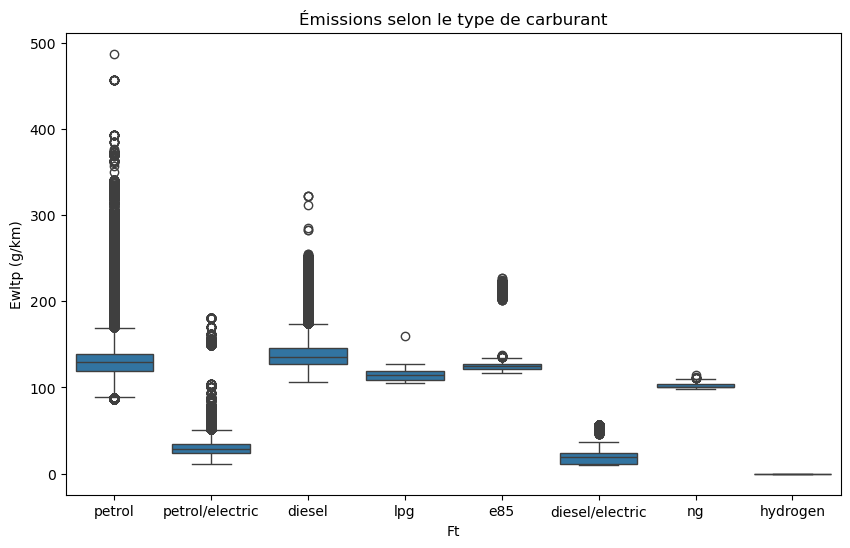

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("C:\\Users\\Pc\\Downloads\\ReducedFRCO2.csv")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ft', y='Ewltp (g/km)')
plt.title('Émissions selon le type de carburant')
plt.show()

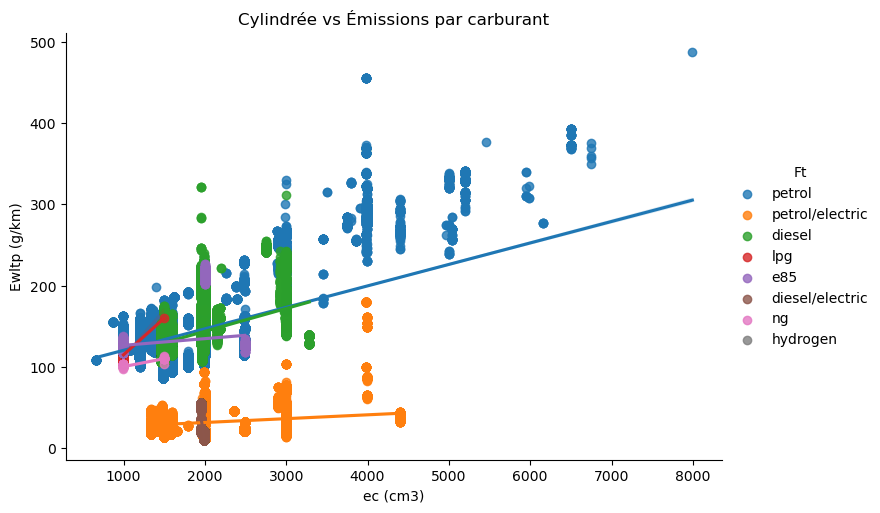

In [15]:
sns.lmplot(data=df, x='ec (cm3)', y='Ewltp (g/km)', hue='Ft', aspect=1.5)
plt.title('Cylindrée vs Émissions par carburant')
plt.show()

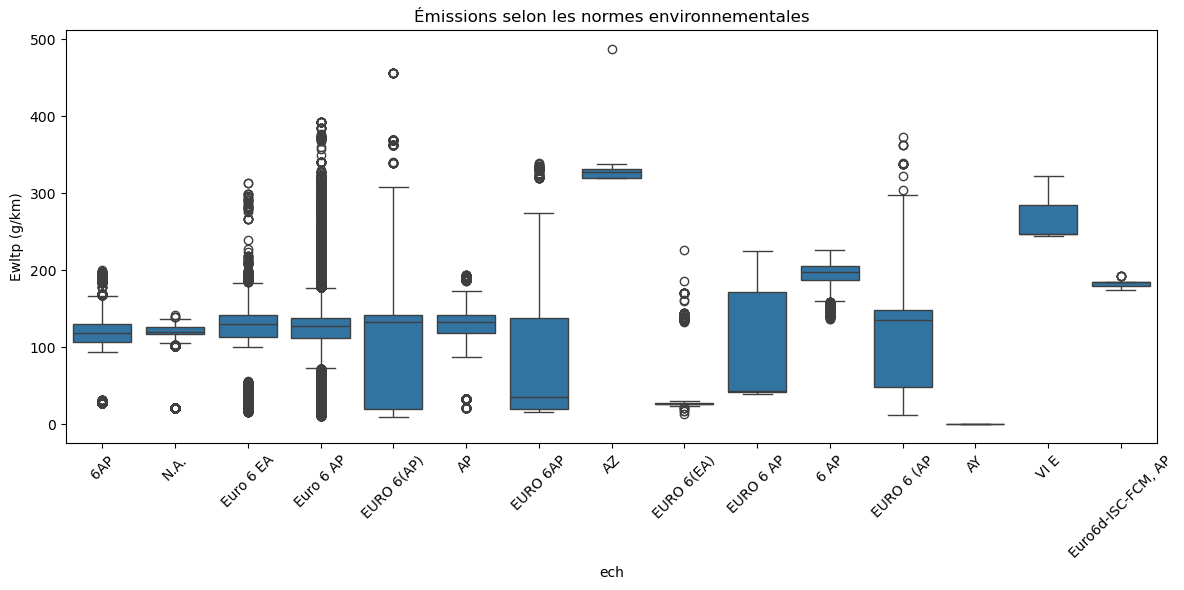

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ech', y='Ewltp (g/km)')
plt.xticks(rotation=45)
plt.title('Émissions selon les normes environnementales')
plt.tight_layout()
plt.show()

C:\Users\Pc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


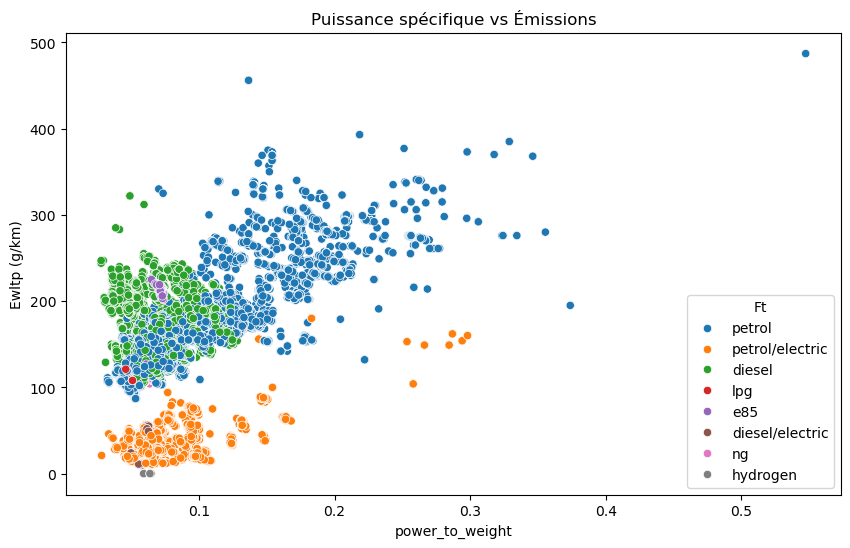

In [17]:
# Calcul de la puissance spécifique
df['power_to_weight'] = df['ep (KW)'] / df['Mt']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='power_to_weight', y='Ewltp (g/km)', hue='Ft')
plt.title('Puissance spécifique vs Émissions')
plt.show()

In [18]:
top5_polluants = df.sort_values(by='Ewltp (g/km)', ascending=False).head(5)
top5_sobres = df.sort_values(by='Ewltp (g/km)', ascending=True).head(5)

print("Top 5 véhicules les plus émetteurs :")
print(top5_polluants[['Mk', 'Cn', 'Ewltp (g/km)', 'Ft']])
print("\nTop 5 véhicules les plus sobres :")
print(top5_sobres[['Mk', 'Cn', 'Ewltp (g/km)', 'Ft']])

Top 5 véhicules les plus émetteurs :
                  Mk                          Cn  Ewltp (g/km)      Ft
596291       BUGATTI  BUGATTI CHIRON SUPER SPORT           487  petrol
265952  MERCEDES AMG               AMG G 63 4X42           456  petrol
397895  MERCEDES AMG               AMG G 63 4X42           456  petrol
39184   MERCEDES AMG               AMG G 63 4X42           456  petrol
586956  MERCEDES AMG               AMG G 63 4X42           456  petrol

Top 5 véhicules les plus sobres :
             Mk            Cn  Ewltp (g/km)        Ft
40898    TOYOTA  TOYOTA MIRAI             0  hydrogen
427858  HYUNDAI          NEXO             0  hydrogen
4781     TOYOTA  TOYOTA MIRAI             0  hydrogen
17469    TOYOTA  TOYOTA MIRAI             0  hydrogen
72942    TOYOTA  TOYOTA MIRAI             0  hydrogen


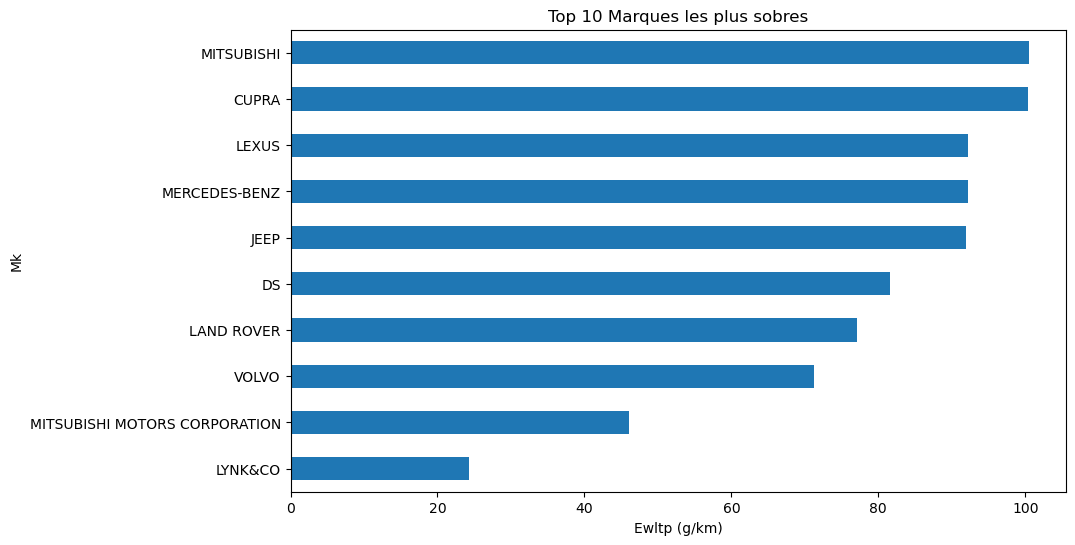

In [19]:
mean_emissions_by_brand = df.groupby('Mk')['Ewltp (g/km)'].mean().sort_values()
mean_emissions_by_brand.head(10).plot(kind='barh', figsize=(10, 6), title='Top 10 Marques les plus sobres')
plt.xlabel('Ewltp (g/km)')
plt.show()

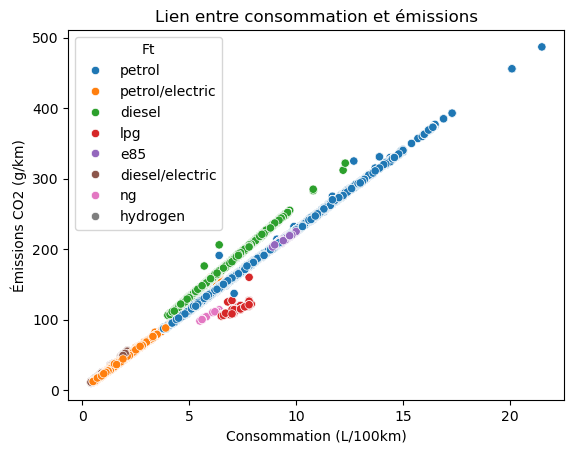

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
df.columns = df.columns.str.strip()

sns.scatterplot(data=df, 
                x='Fuel consumption', 
                y='Ewltp (g/km)', 
                hue='Ft')

plt.title('Lien entre consommation et émissions')
plt.xlabel('Consommation (L/100km)')
plt.ylabel('Émissions CO2 (g/km)')
plt.show()

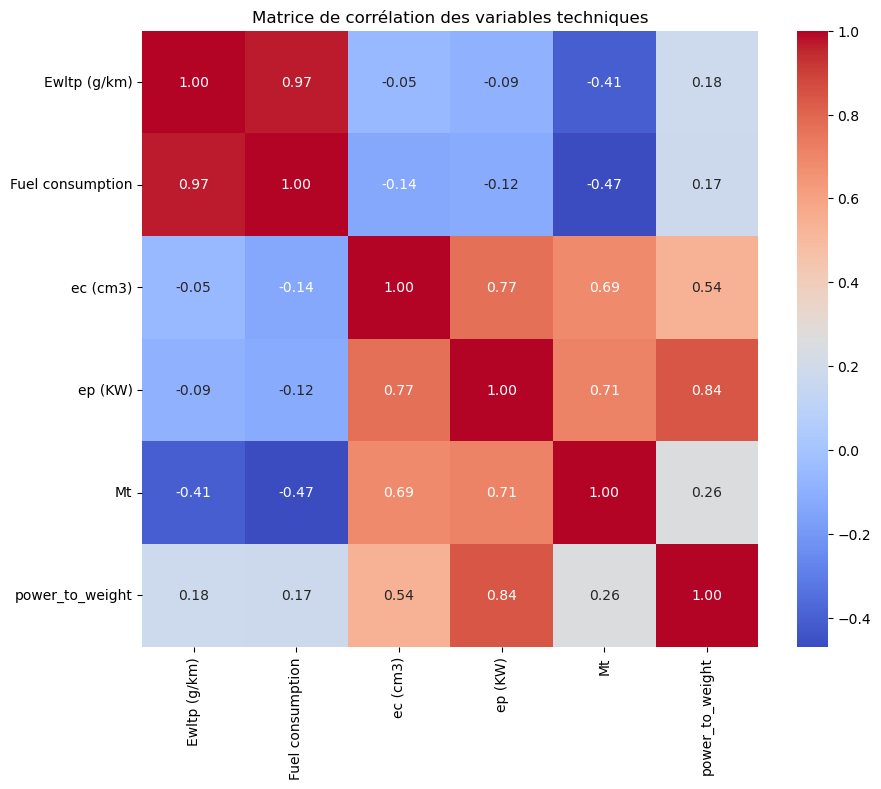

In [21]:
# Nettoyage éventuel des noms de colonnes
df.columns = df.columns.str.strip()


# Ajout de la puissance spécifique
df['power_to_weight'] = df['ep (KW)'] / df['Mt']

# Sélection des colonnes à corréler
colonnes_corr = ['Ewltp (g/km)', 'Fuel consumption', 'ec (cm3)', 'ep (KW)', 'Mt', 'power_to_weight']
df_corr = df[colonnes_corr].copy()

# Calcul de la matrice de corrélation
correlation_matrix = df_corr.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matrice de corrélation des variables techniques")
plt.show()